In [1]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://api.covid19api.com/total/country/US"
response = urllib.request.urlopen(url)
jsondata = json.loads(response.read())
df=pd.json_normalize(jsondata)
df['DeathRate']=df['Deaths']*100/(df['Deaths']+df['Recovered'])
df['RecoveredRate']=df['Recovered']*100/(df['Deaths']+df['Recovered'])
df.describe()

,Confirmed,Deaths,Recovered,Active,DeathRate,RecoveredRate
count,91.000000,91.000000,91.000000,91.0,73.000000,73.000000
mean,131593.791209,5345.967033,8810.549451,0.0,38.773531,61.226469
std,233157.077861,11128.348029,18882.814778,0.0,28.979998,28.979998
min,0.000000,0.000000,0.000000,0.0,0.000000,13.709677
25%,13.000000,0.000000,3.000000,0.0,0.000000,35.627530
50%,336.000000,17.000000,7.000000,0.0,38.395560,61.604440
75%,151370.000000,2833.500000,4154.500000,0.0,64.372470,100.000000
max,816963.000000,44781.000000,75204.000000,0.0,86.290323,100.000000


In [3]:
url = "https://api.covid19api.com/live/country/US"
response = urllib.request.urlopen(url)
jsondata = json.loads(response.read())
province_df=pd.json_normalize(jsondata)
province_df['Recovered']=province_df['Confirmed']-province_df['Active']-province_df['Deaths']
province_df['Lat'] = province_df['Lat'].astype('float64') 
province_df['Lon'] = province_df['Lon'].astype('float64') 
province_df.describe()

,Lat,Lon,Confirmed,Deaths,Recovered,Active
count,572.000000,572.000000,572.000000,572.000000,572.0,572.000000
mean,37.594930,-80.148252,11990.458042,593.120629,0.0,11397.337413
std,8.523381,56.283637,31495.414569,2073.603832,0.0,29465.860423
min,0.000000,-157.500000,11.000000,0.000000,0.0,9.000000
25%,34.970000,-99.780000,985.000000,26.750000,0.0,962.000000
50%,39.060000,-86.900000,2968.000000,110.000000,0.0,2884.000000
75%,42.230000,-76.800000,10477.500000,418.500000,0.0,9987.000000
max,61.370000,145.670000,258484.000000,19114.000000,0.0,239370.000000


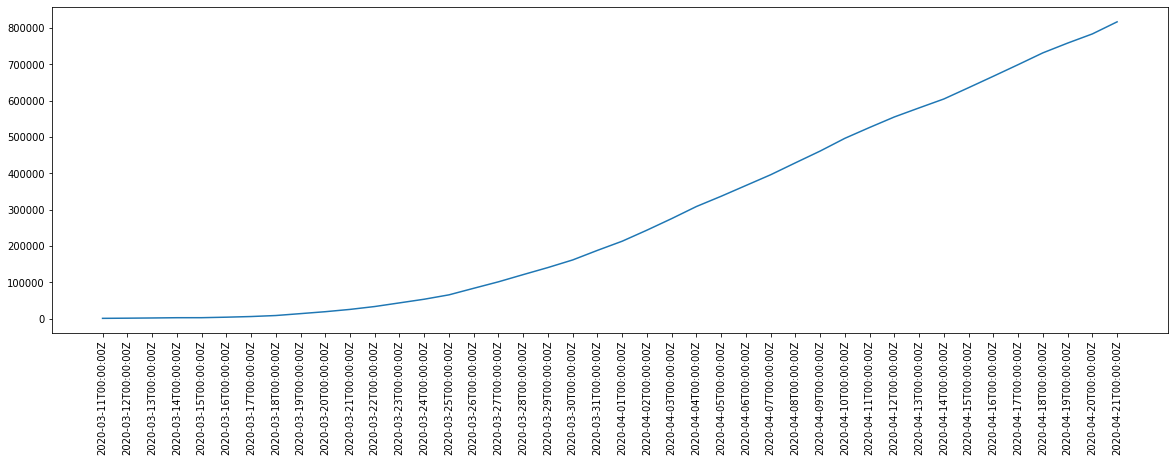

In [4]:
a1f=df[df['Confirmed']>1000]
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(a1f['Date'], a1f['Confirmed'])
plt.xticks(rotation=90)
plt.show()

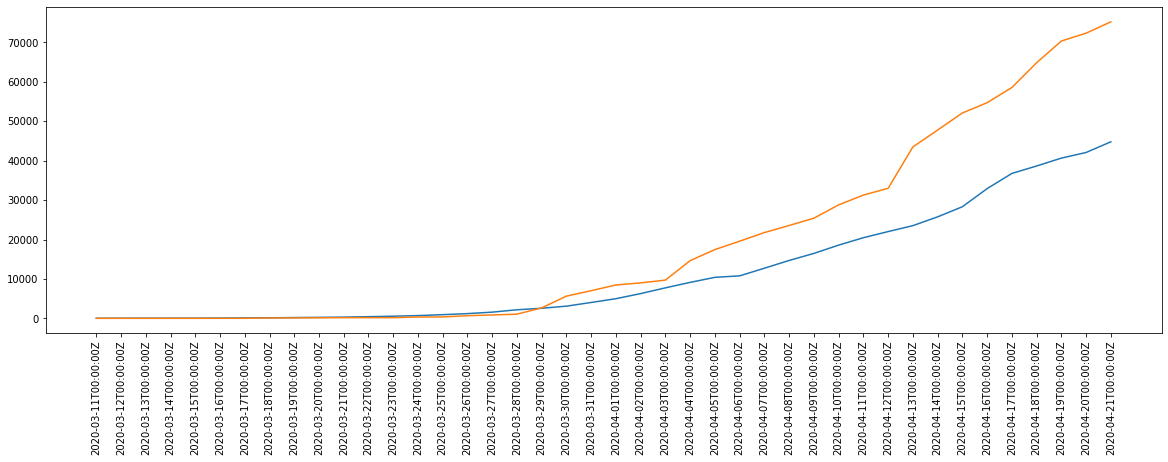

In [5]:
a1f=df[df['Confirmed']>1000]
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(a1f['Date'], a1f['Deaths'])
plt.plot(a1f['Date'], a1f['Recovered'])
plt.xticks(rotation=90)
plt.show()

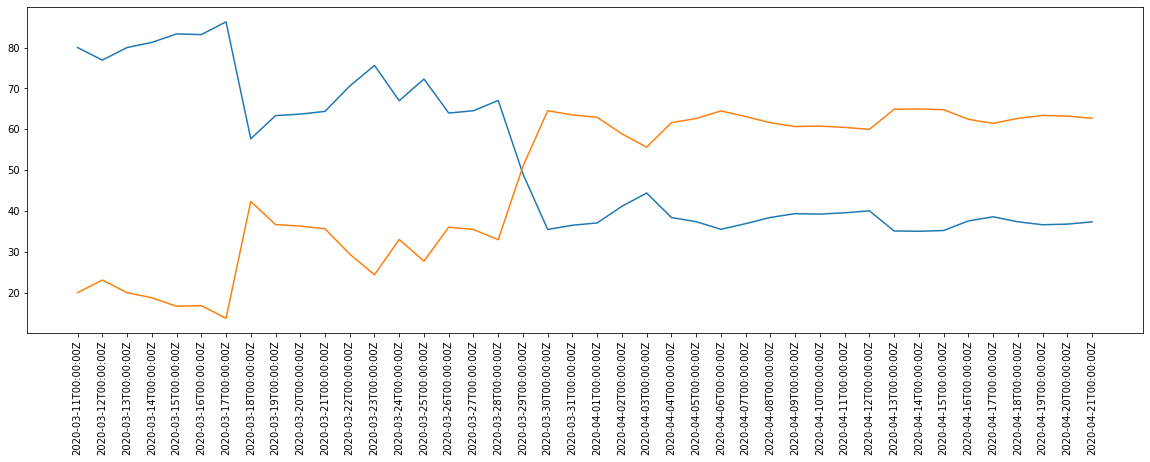

In [6]:
a1f=df[df['Confirmed']>1000]
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(a1f['Date'], a1f['DeathRate'])
plt.plot(a1f['Date'], a1f['RecoveredRate'])
plt.xticks(rotation=90)
plt.show()

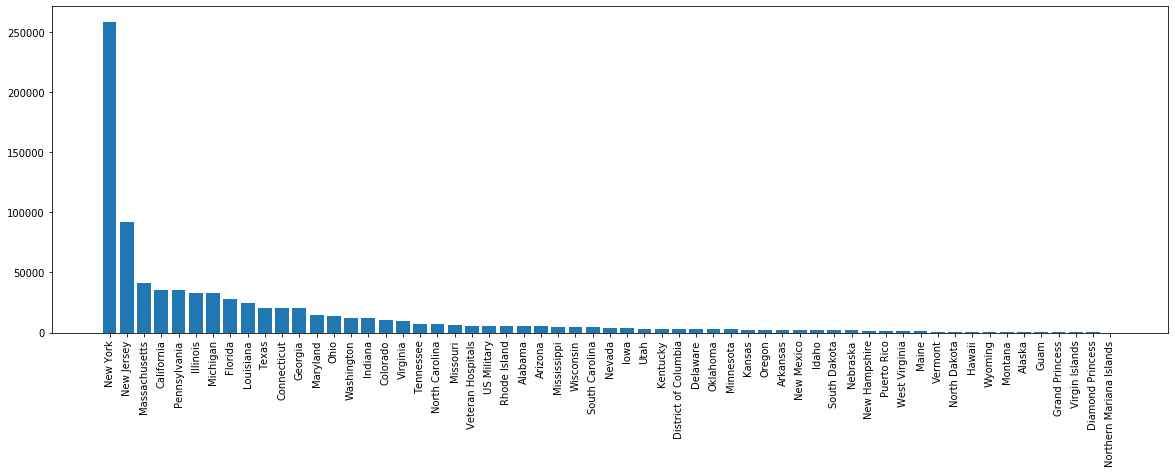

In [7]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=province_df.sort_values(by='Confirmed',ascending=False)
plt.bar(a1f['Province'],a1f['Confirmed'])
plt.xticks(rotation=90)
plt.show()

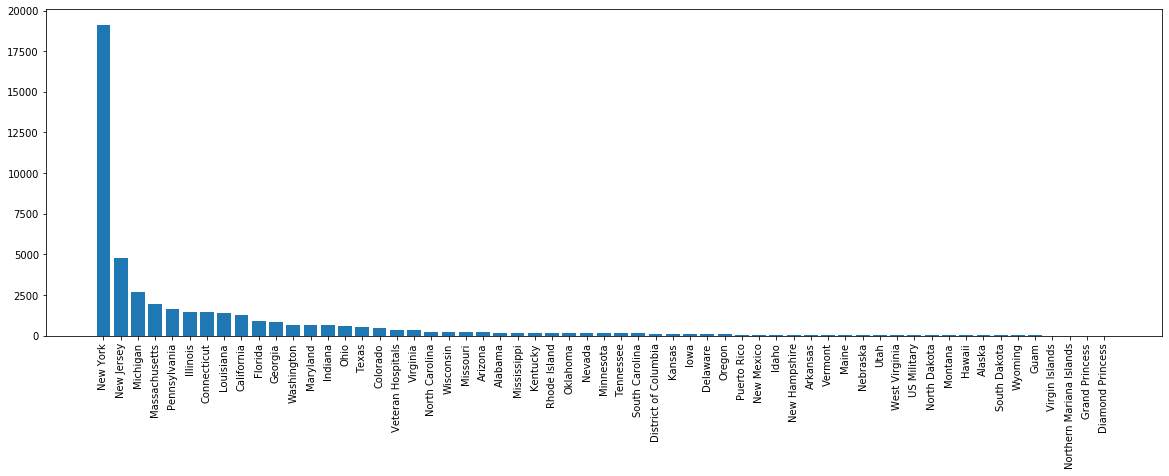

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=province_df.sort_values(by='Deaths',ascending=False)
plt.bar(a1f['Province'],a1f['Deaths'])
plt.xticks(rotation=90)
plt.show()

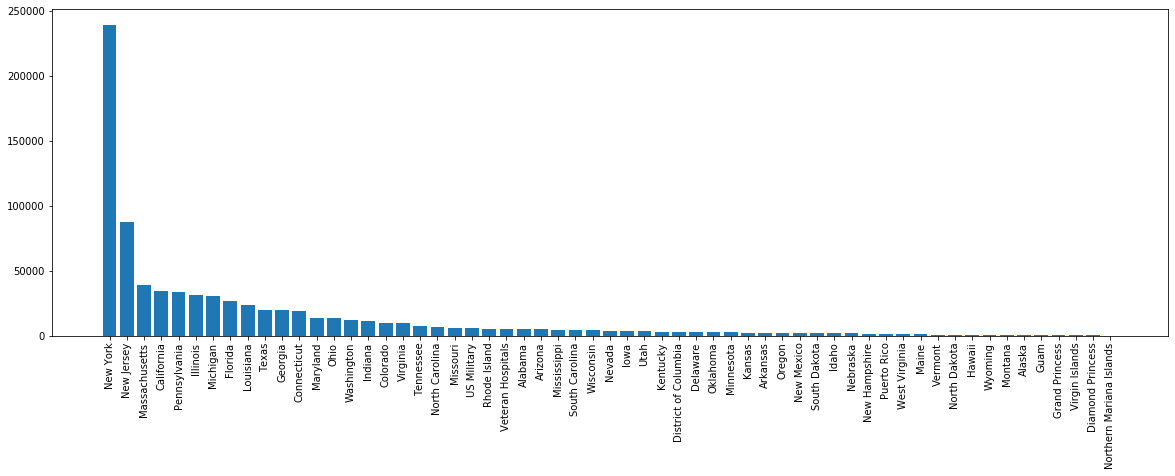

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=province_df.sort_values(by='Active',ascending=False)
plt.bar(a1f['Province'],a1f['Active'])
plt.xticks(rotation=90)
plt.show()

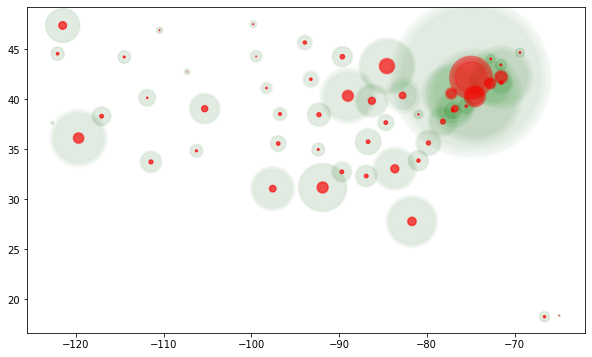

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
map_df=province_df[(province_df['Lon']<-60)&(province_df['Lon']>-140)]
plt.scatter(map_df['Lon'], map_df['Lat'],s=map_df['Confirmed']/10, alpha=0.01,color="green")
plt.scatter(map_df['Lon'], map_df['Lat'],s=map_df['Deaths']/10, alpha=0.1,color="red")
plt.show()

In [11]:
from ipyleaflet import *

In [12]:
m = Map(
    center=(38.759334, -100.946282),
    zoom=4
)
for index, row in province_df.iterrows():
    circle = Circle()
    circle.location = (row['Lat'], row['Lon'])
    circle.radius = row['Confirmed']
    circle.fill_color = "green"
    circle.color="green"
    circle.opacity=0.1
    m.add_layer(circle)
m


Map(center=[38.759334, -100.946282], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [13]:
m = Map(
    center=(38.759334, -100.946282),
    zoom=4
)
for index, row in province_df.iterrows():
    circle = Circle()
    circle.location = (row['Lat'], row['Lon'])
    circle.radius = row['Deaths']*5
    circle.fill_color = "red"
    circle.color="red"
    circle.opacity=0.1
    m.add_layer(circle)
m

Map(center=[38.759334, -100.946282], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…